In [2]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn

import os

# Import your cleaned train script
import finaltrainscript as fts
import datascript
from datascript import load_data, split_data

# Import your model from model.py
from model import LSTMModel
import ray
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [3]:
# Set up loss functions
train_criterion = nn.MSELoss()  
test_criterion = fts.RMSELoss()
L1 = nn.L1Loss()
MAPE = fts.MAPELoss()



In [ ]:
ray.shutdown()  # Shutdown any existing Ray instances
ray.init(ignore_reinit_error=True)

In [4]:
specific= False
target_labels=["GWAP","LWAP"] 
regionnames=["LUZ","VIS","MIN"]
islands = ["Luzon","Visayas","Mindanao"]

In [5]:

epoch = 200
trials = 2000
output_base_folder = os.path.dirname(os.path.abspath(datascript.__file__)) 



In [6]:
specific_config = [
    {'hidden_size': 16, 'lr': 0.005224482445191083, 'weight_decay': 5.362496349224092e-05, 'dropout': 0.19918690808173656, 'activation_fn': 'tanh', 'activation_fn1': 'identity', 'seed': 1, 'num_layers': 1, 'patience': 10, 'factor': 0.4924630888769119, 'seq_len': 3, 'batch_size': 256, 'norm_layer_type': 'batch_norm', 'lambda_reg': 0.005488599770799952},
    {'hidden_size': 16, 'lr': 0.0008565839866450798, 'weight_decay': 0.0006472487016082252, 'dropout': 0.21979866572901888, 'activation_fn': 'tanh', 'activation_fn1': 'identity', 'seed': 1, 'num_layers': 1, 'patience': 20, 'factor': 0.13385813471006214, 'seq_len': 7, 'batch_size': 64, 'norm_layer_type': 'batch_norm', 'lambda_reg': 0.010664316934265351},
    {'hidden_size': 32, 'lr': 0.005892152973924203, 'weight_decay': 8.467900651427163e-05, 'dropout': 0.1671813129500581, 'activation_fn': 'tanh', 'activation_fn1': 'sigmoid', 'seed': 1, 'num_layers': 1, 'patience': 20, 'factor': 0.4342733622753347, 'seq_len': 9, 'batch_size': 64, 'norm_layer_type': 'batch_norm', 'lambda_reg': 0.0001753878065626885},
    {'hidden_size': 64, 'lr': 0.004289804447667546, 'weight_decay': 0.006751952064889446, 'dropout': 0.4694048576764199, 'activation_fn': 'tanh', 'activation_fn1': 'sigmoid', 'seed': 1, 'num_layers': 1, 'patience': 10, 'factor': 0.3347552753522513, 'seq_len': 3, 'batch_size': 64, 'norm_layer_type': 'batch_norm', 'lambda_reg': 1.6127975718301737e-05},
    {'hidden_size': 32, 'lr': 0.0098672565506931, 'weight_decay': 0.004691034846389988, 'dropout': 0.2220082934401015, 'activation_fn': 'tanh', 'activation_fn1': 'sigmoid', 'seed': 1, 'num_layers': 1, 'patience': 20, 'factor': 0.23342054298659004, 'seq_len': 5, 'batch_size': 128, 'norm_layer_type': 'batch_norm', 'lambda_reg': 0.001452080922602551},
    {'hidden_size': 32, 'lr': 0.0011233272339433813, 'weight_decay': 0.002036164234166625, 'dropout': 0.1873161123778924, 'activation_fn': 'tanh', 'activation_fn1': 'sigmoid', 'seed': 1, 'num_layers': 1, 'patience': 10, 'factor': 0.3797741459165363, 'seq_len': 3, 'batch_size': 64, 'norm_layer_type': 'batch_norm', 'lambda_reg': 0.0008091819678638857}
]

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average GWAP RMSE loss over 10 runs: 2053.1917
Average GWAP MAE loss over 10 runs: 1470.8510
Average GWAP MAPE loss over 10 runs: 0.2964


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


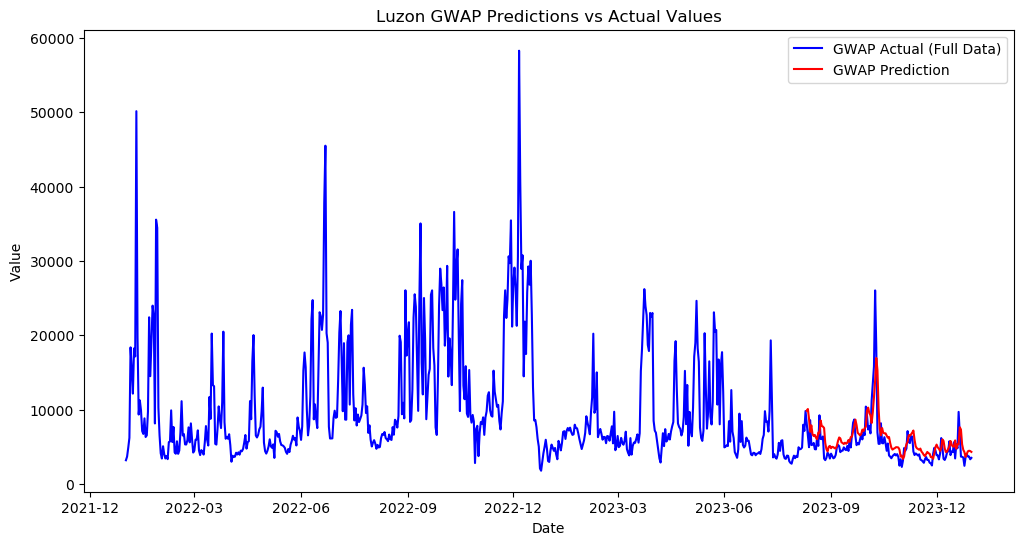

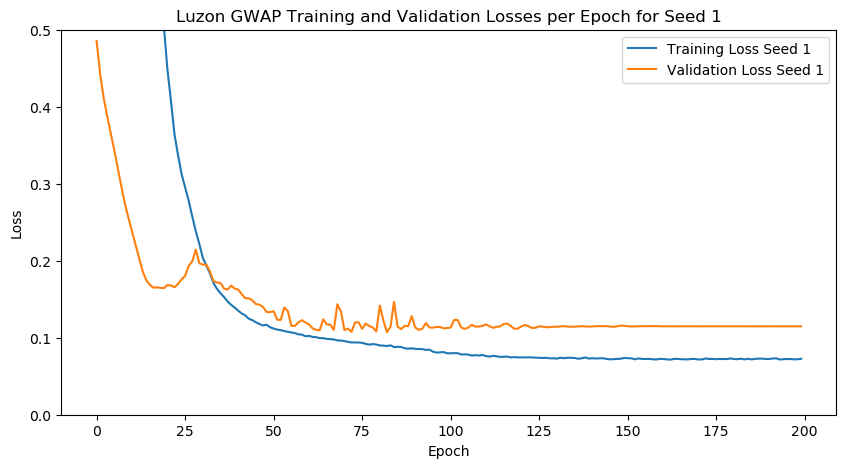

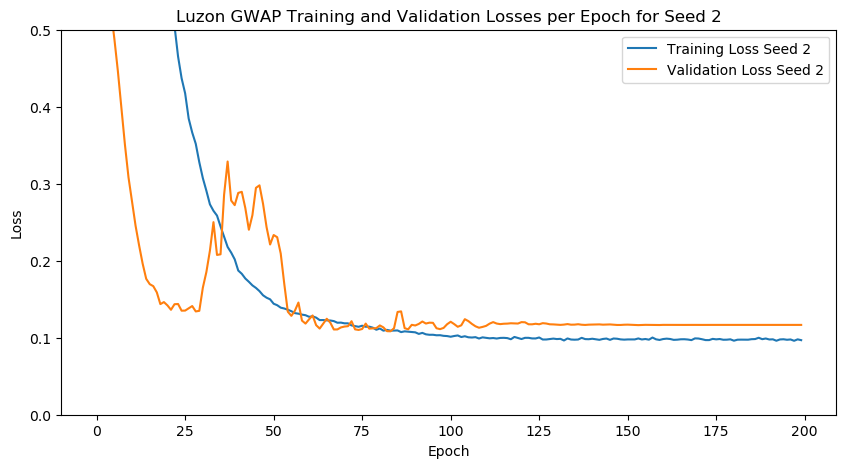

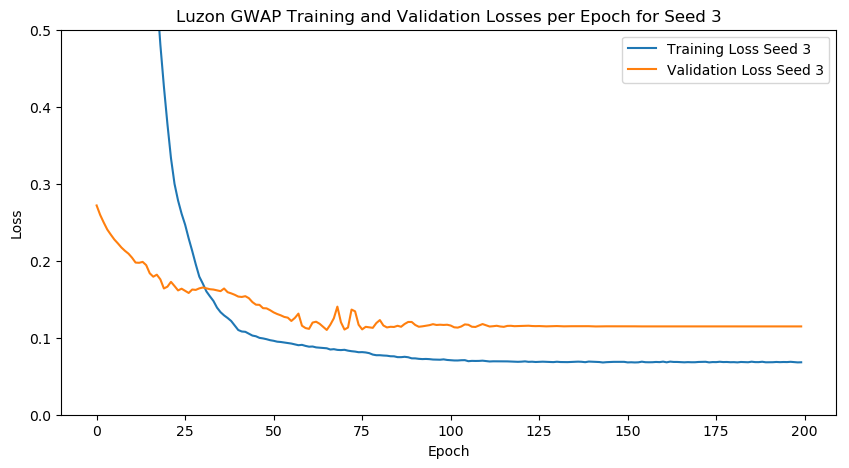

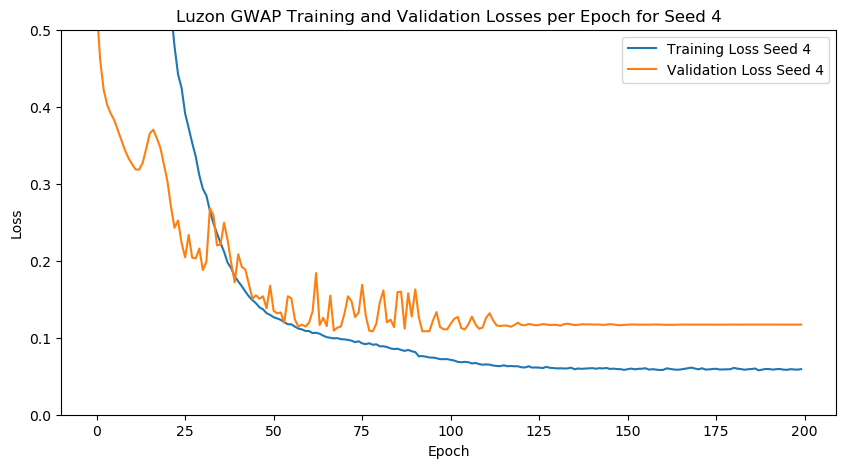

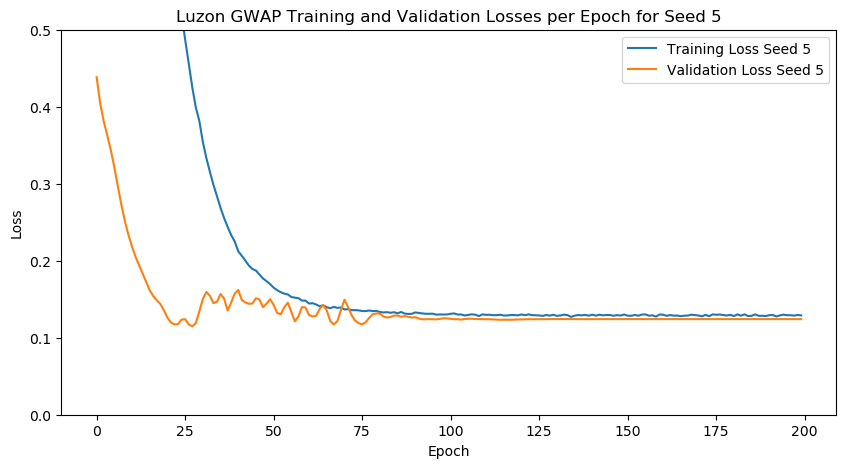

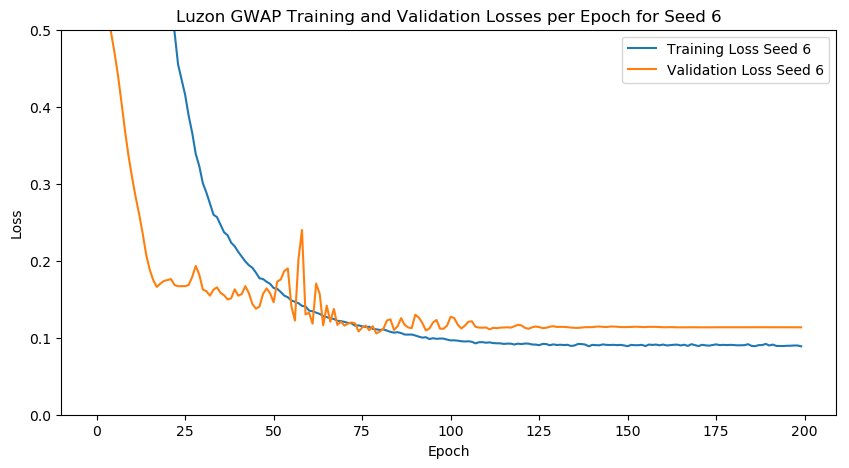

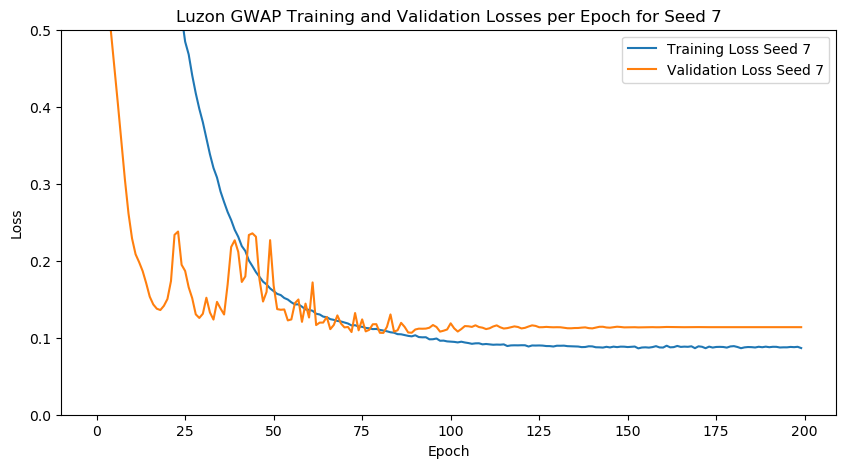

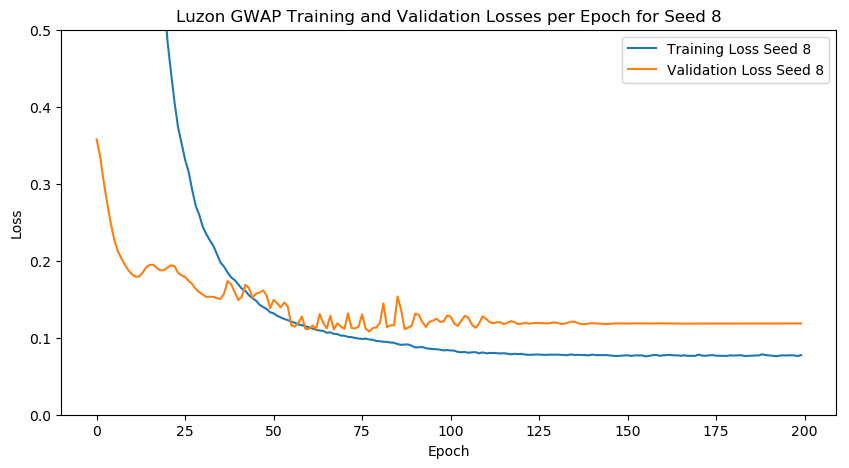

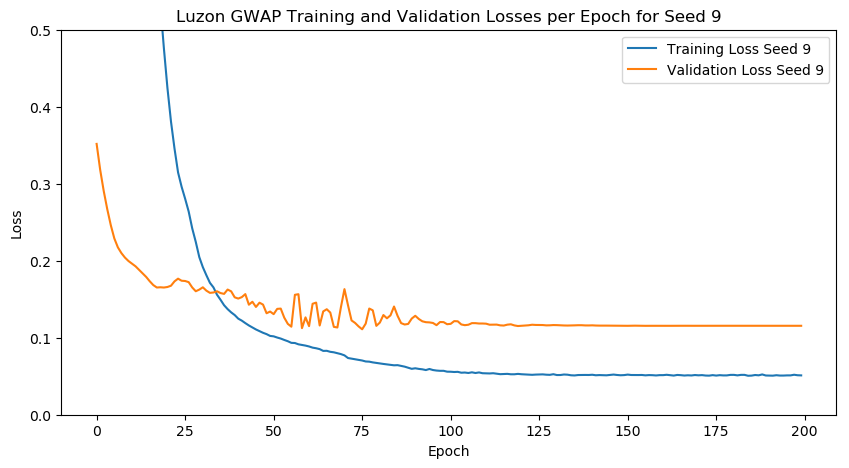

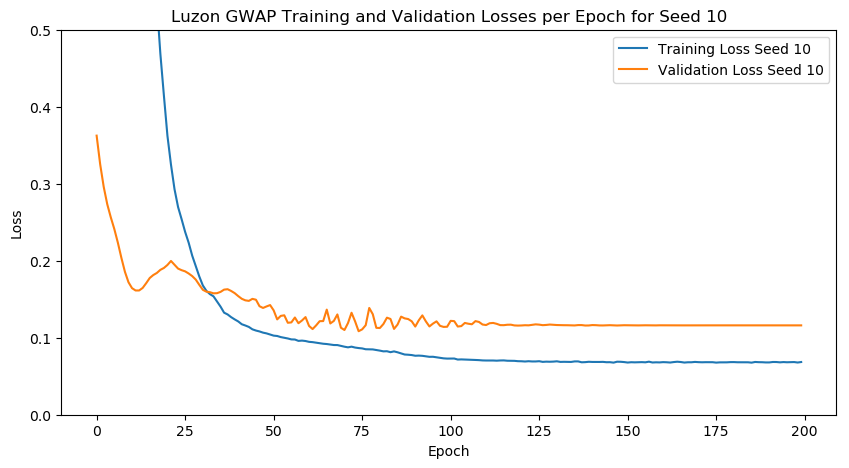

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average LWAP RMSE loss over 10 runs: 2334.8482
Average LWAP MAE loss over 10 runs: 1459.4403
Average LWAP MAPE loss over 10 runs: 0.2738


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


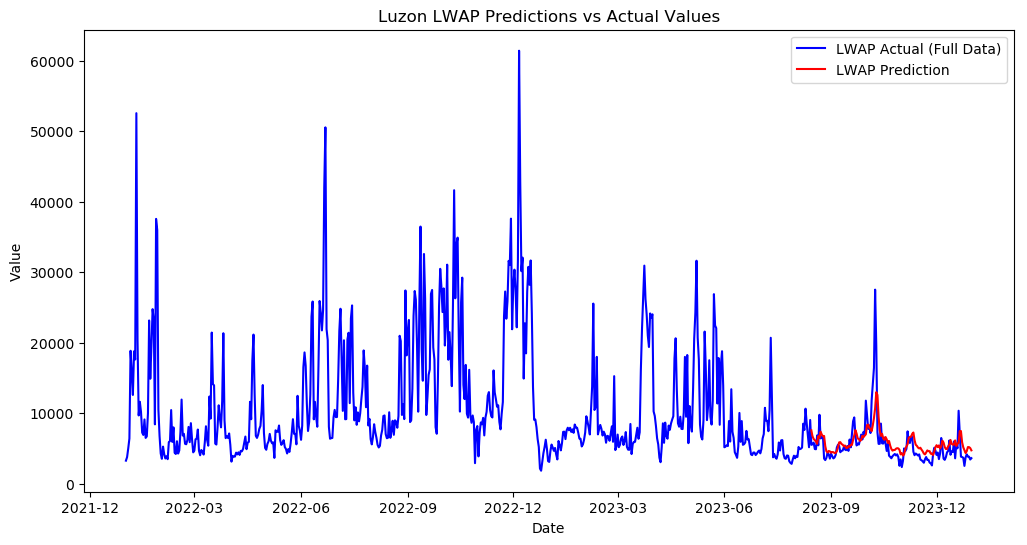

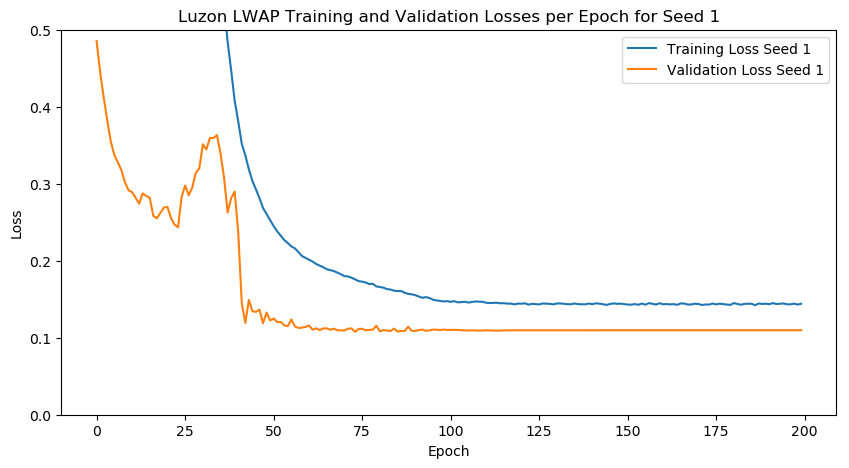

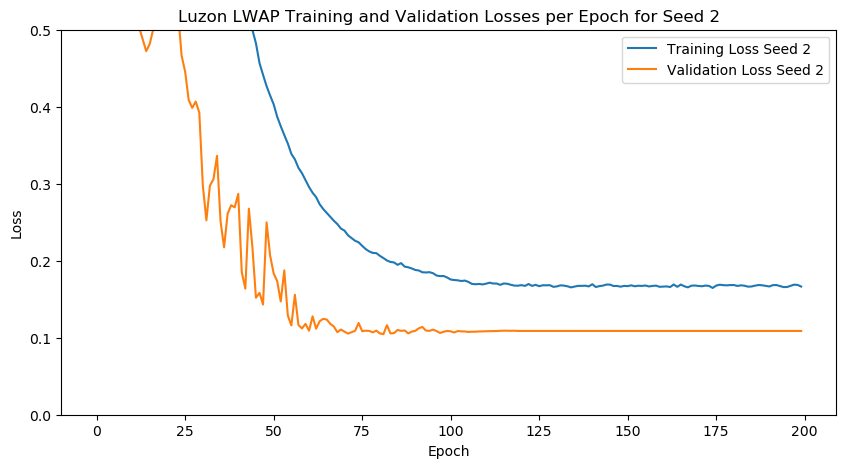

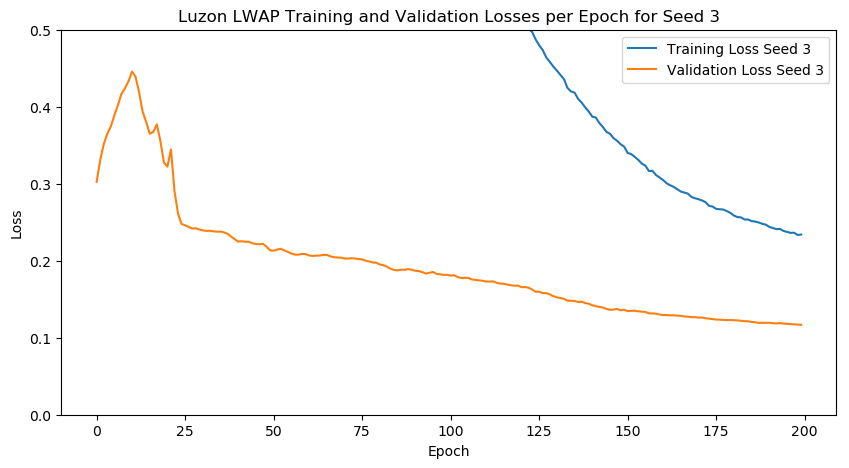

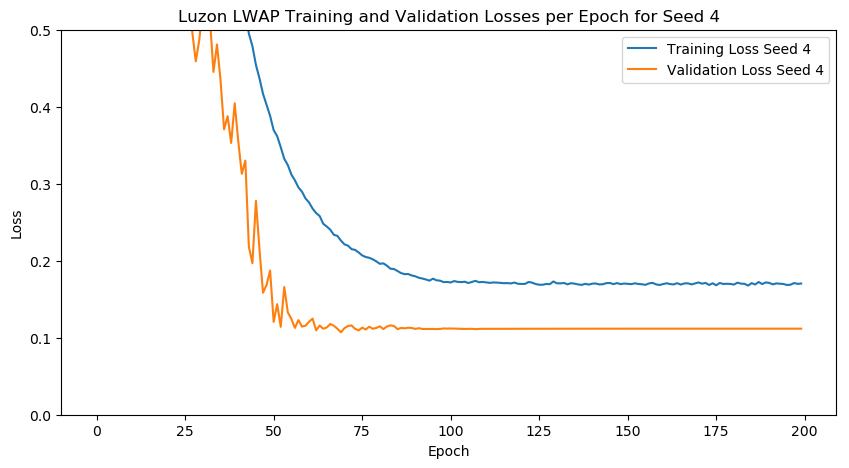

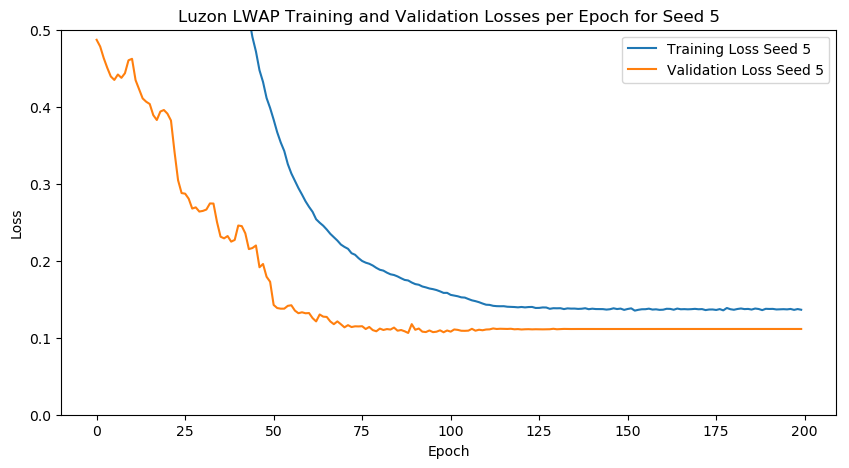

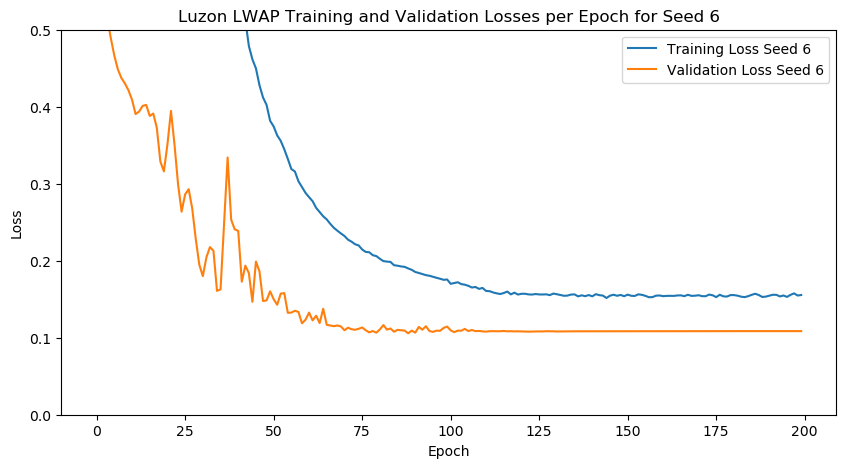

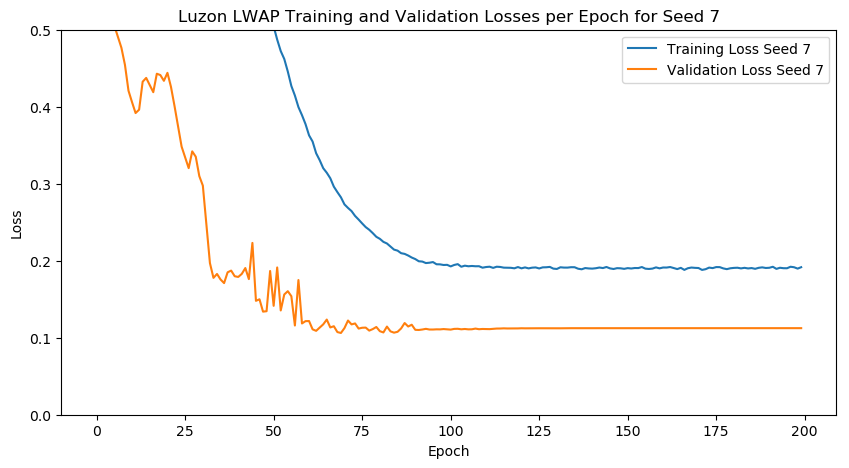

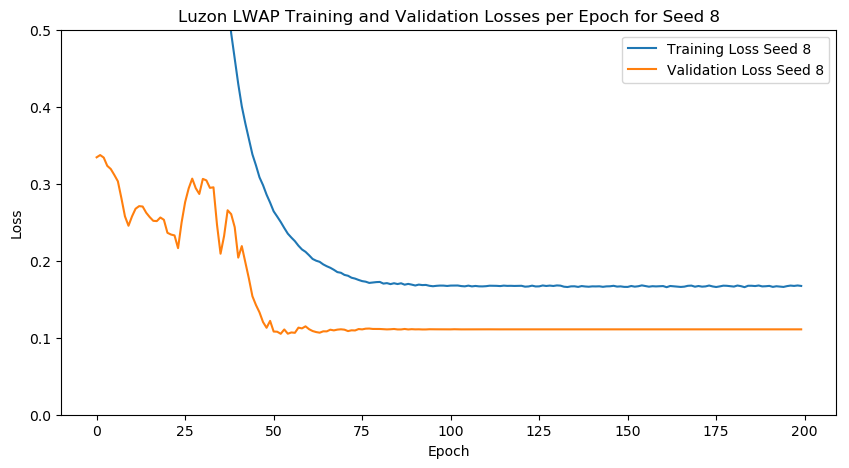

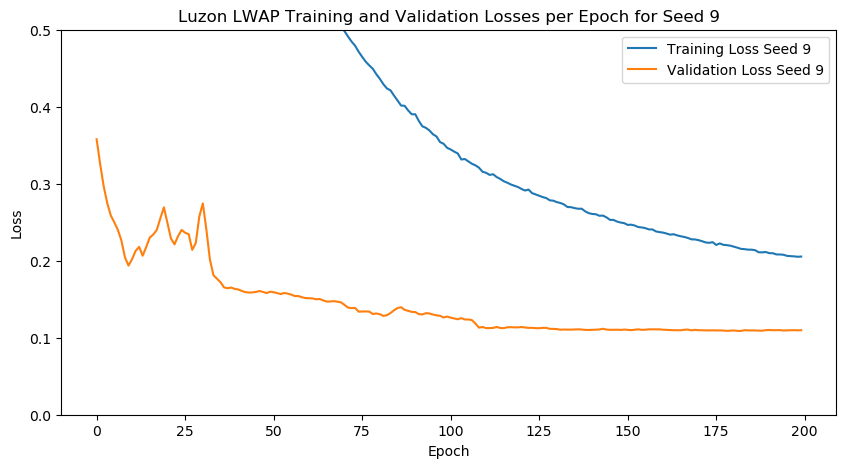

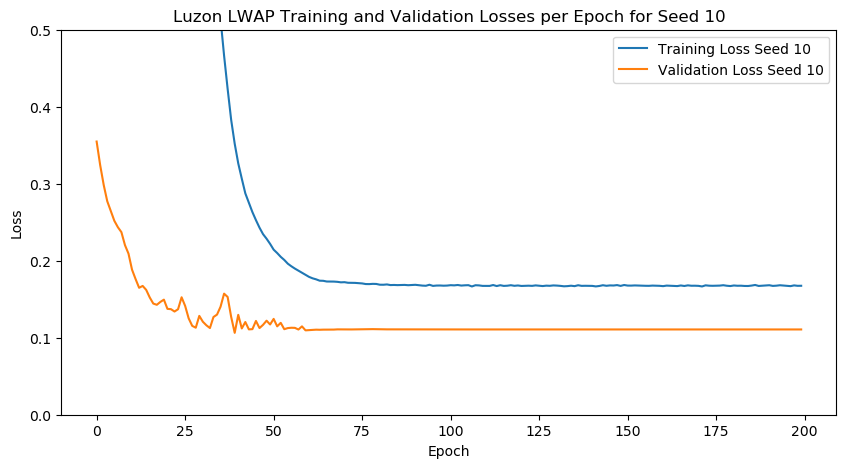

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average GWAP RMSE loss over 10 runs: 2310.5555
Average GWAP MAE loss over 10 runs: 1481.4420
Average GWAP MAPE loss over 10 runs: 0.2262


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


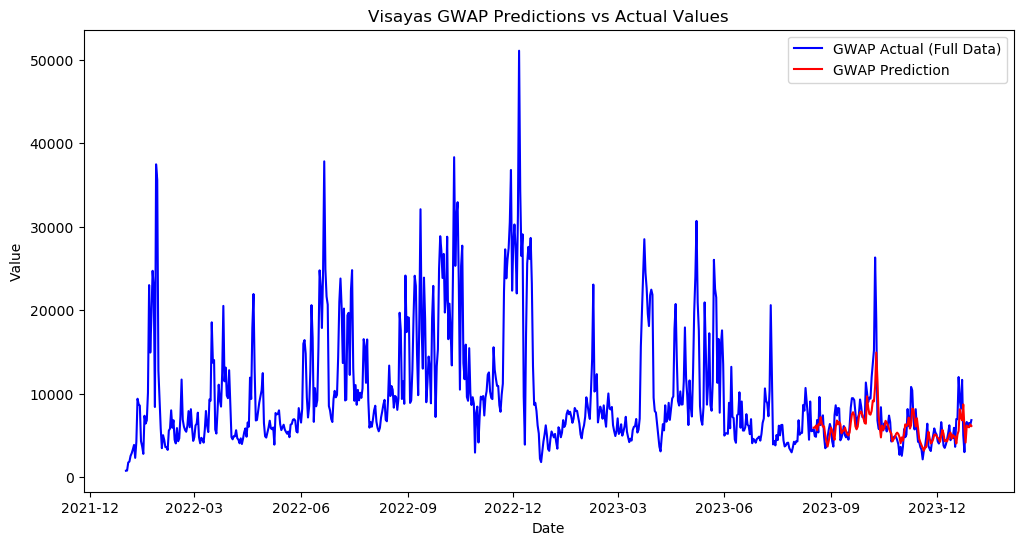

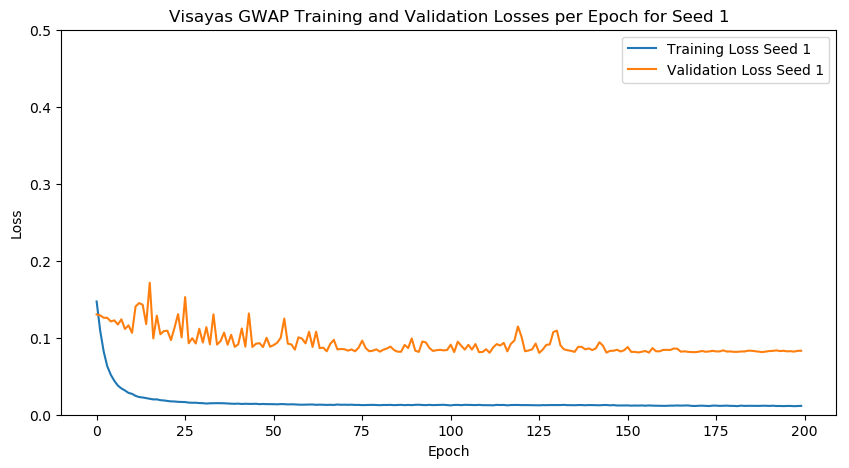

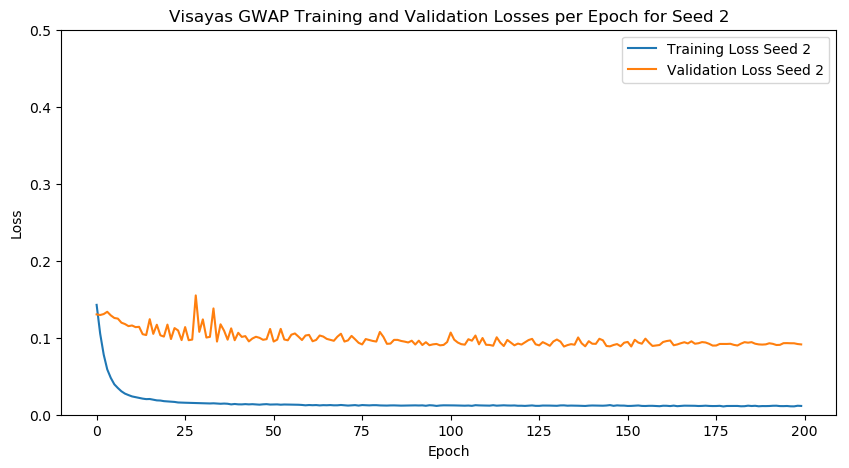

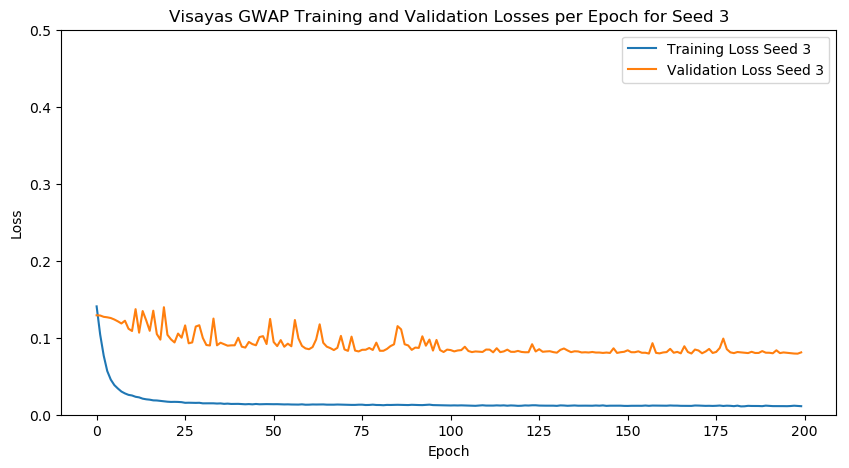

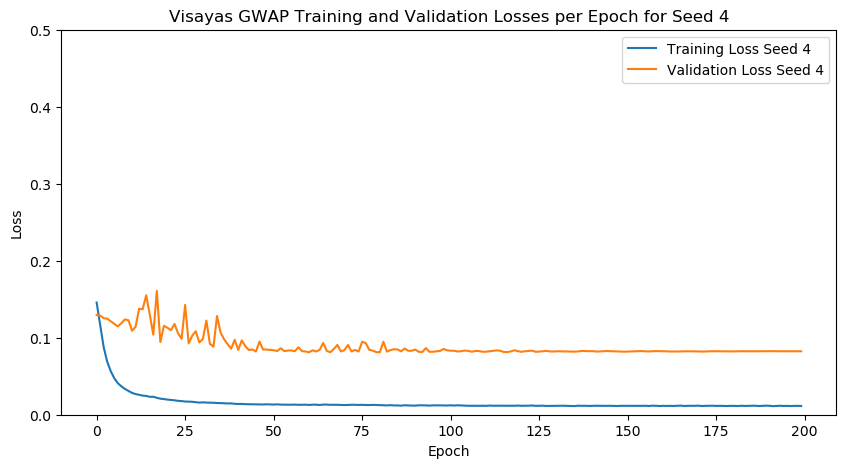

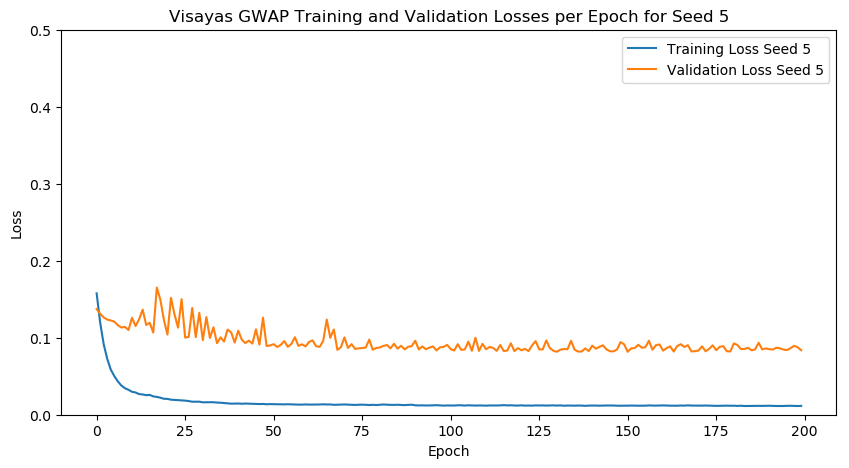

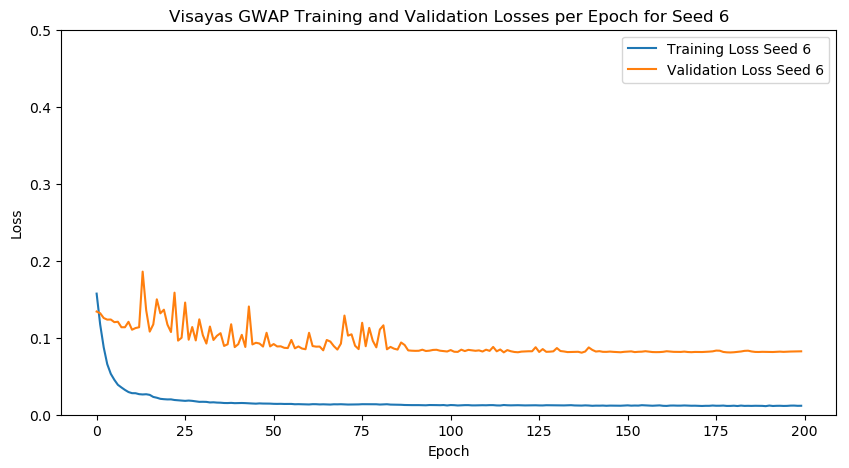

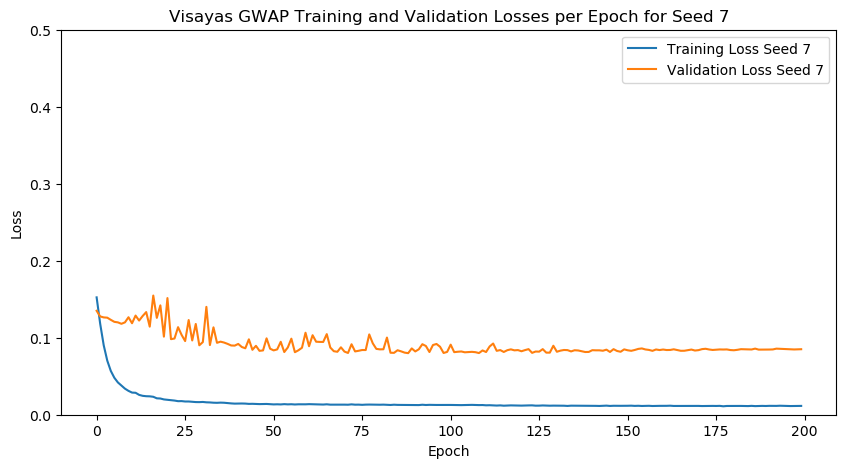

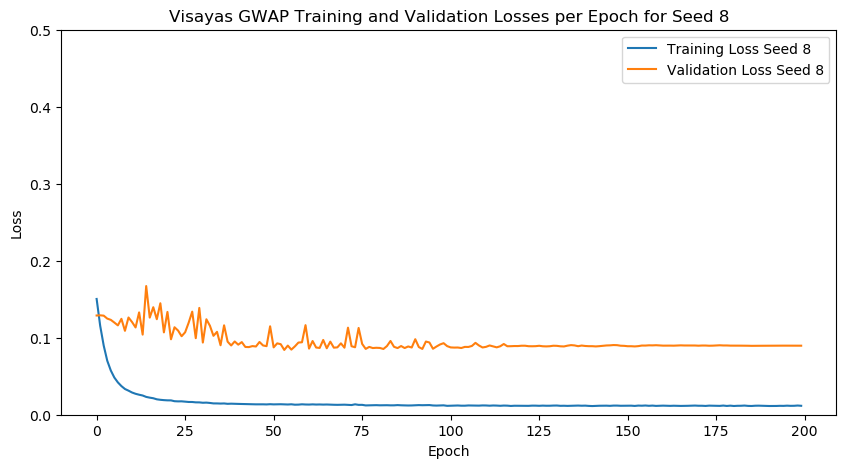

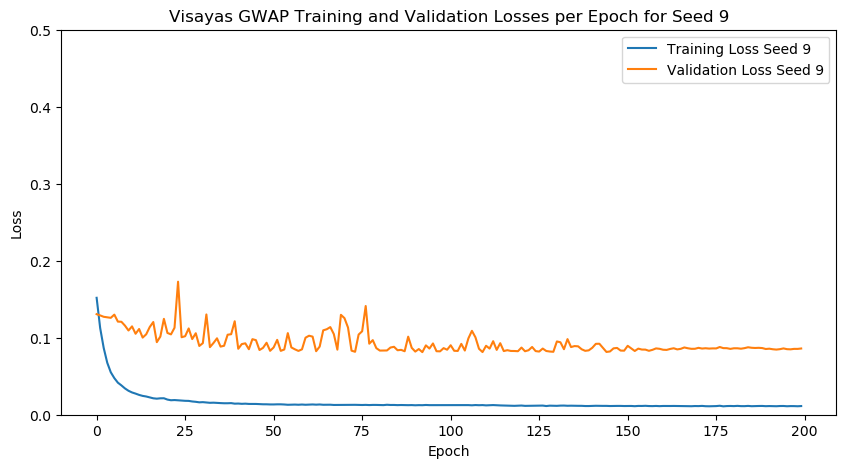

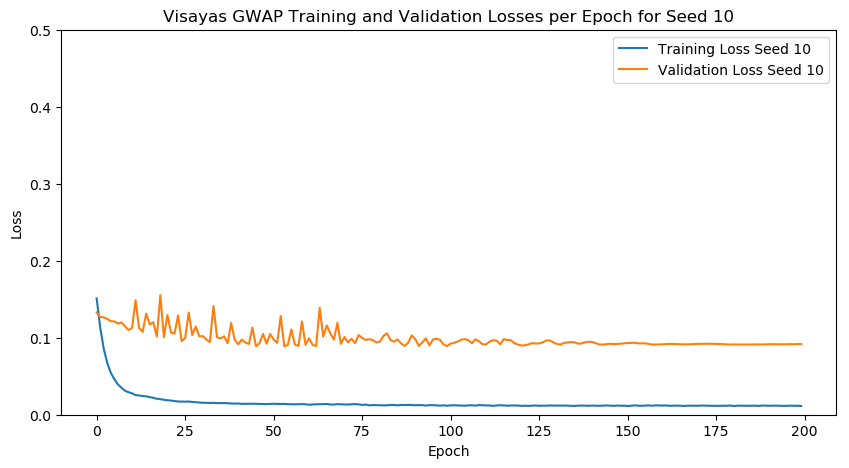

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average LWAP RMSE loss over 10 runs: 2771.9474
Average LWAP MAE loss over 10 runs: 1801.7845
Average LWAP MAPE loss over 10 runs: 0.2544


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


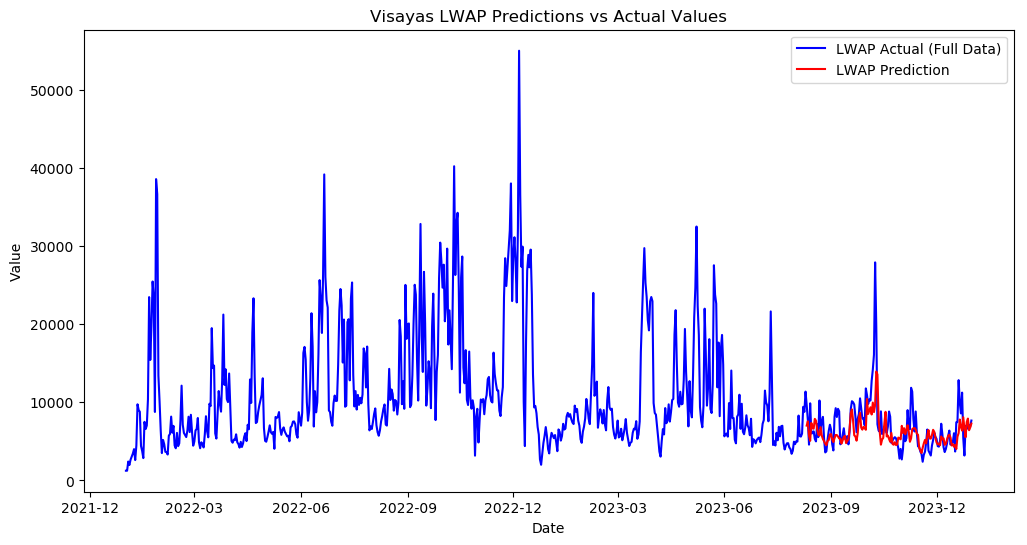

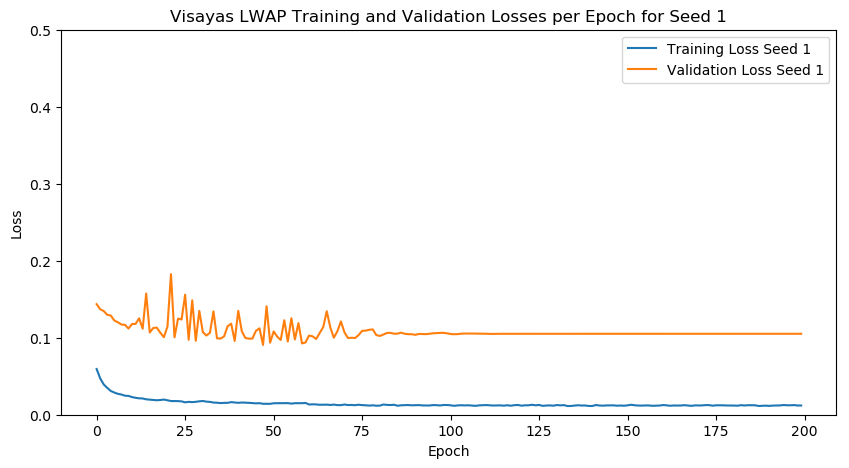

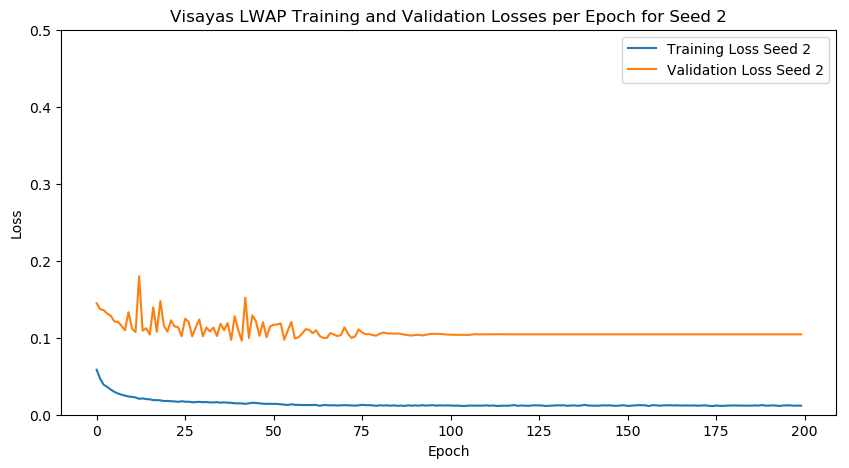

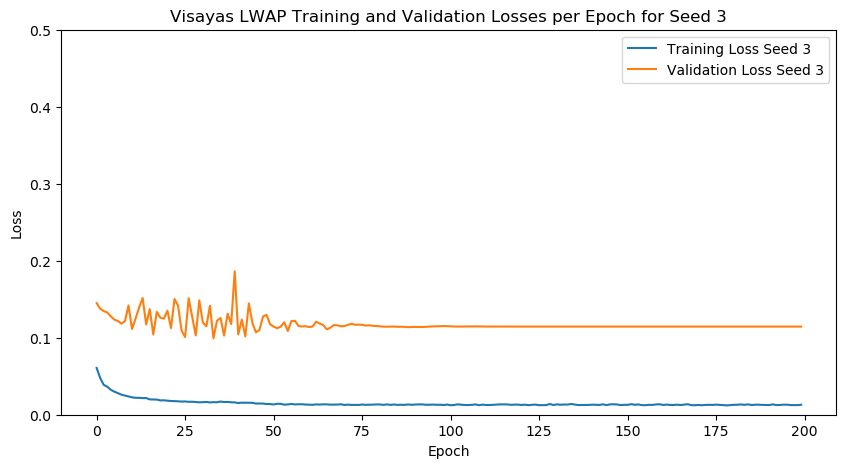

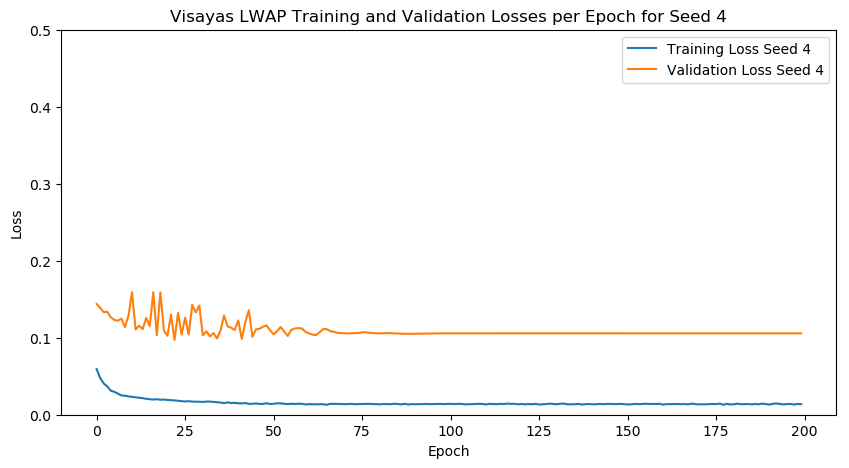

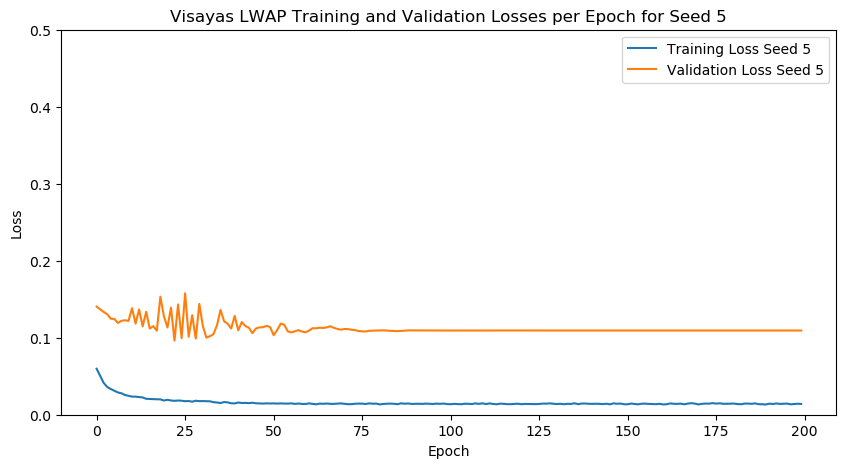

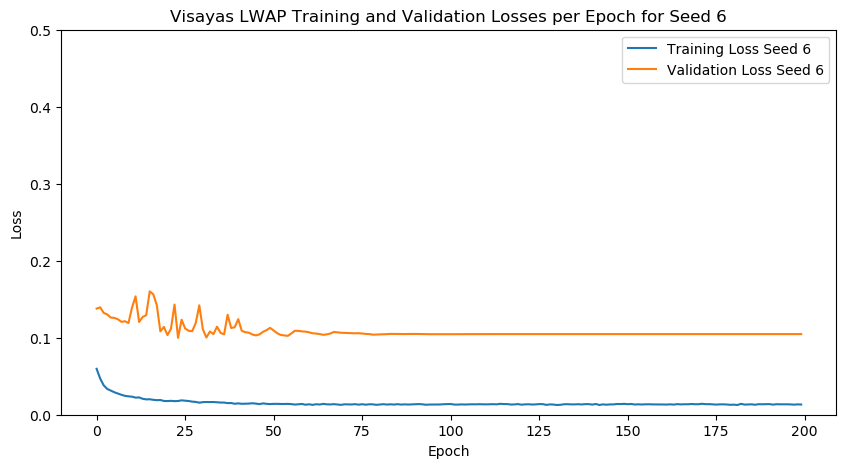

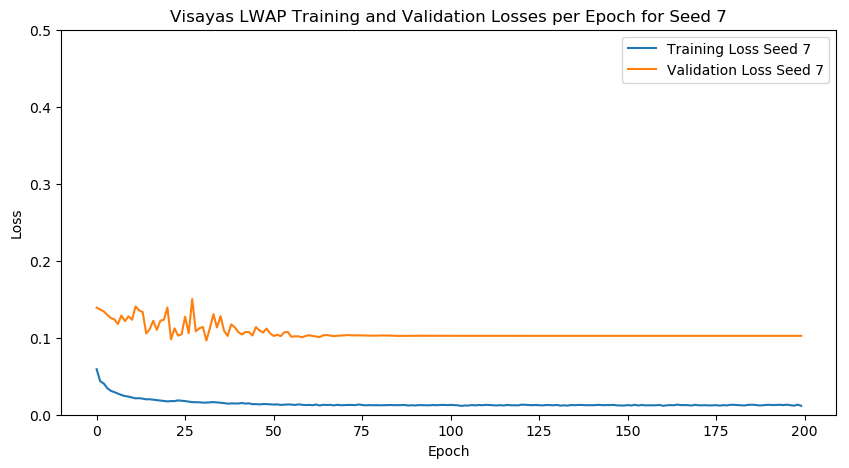

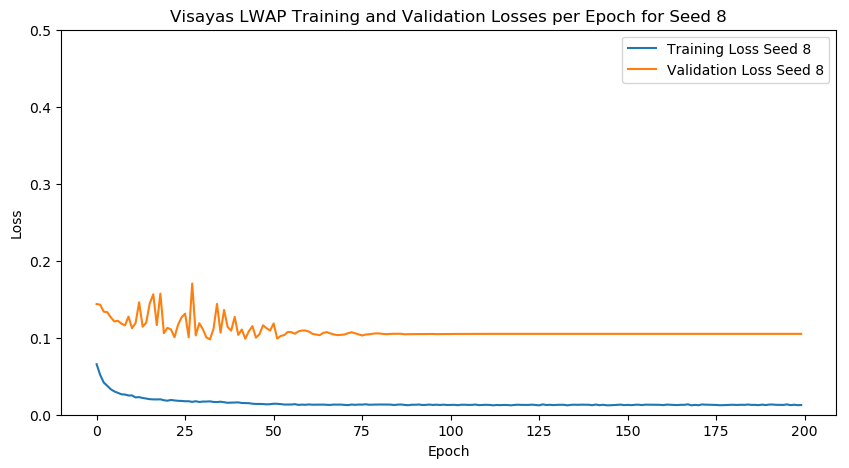

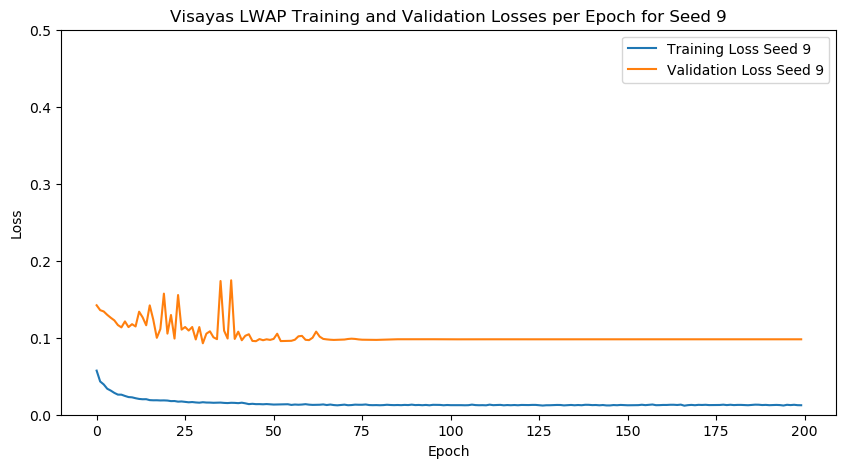

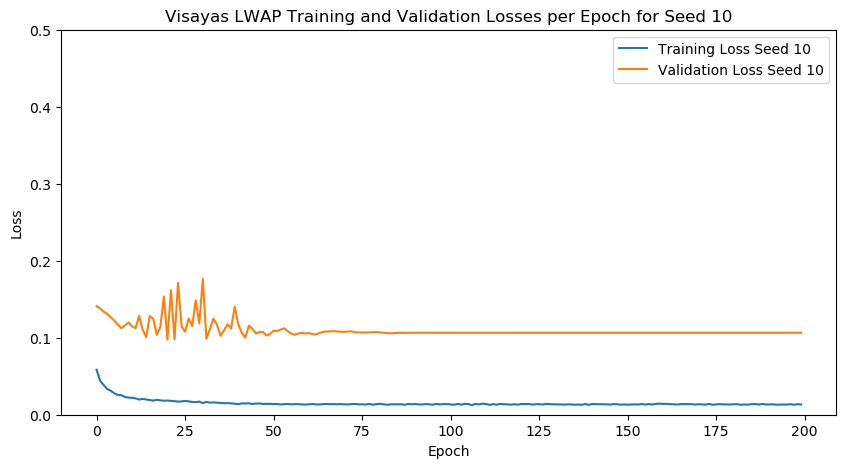

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average GWAP RMSE loss over 10 runs: 945.9120
Average GWAP MAE loss over 10 runs: 762.2764
Average GWAP MAPE loss over 10 runs: 0.2290


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


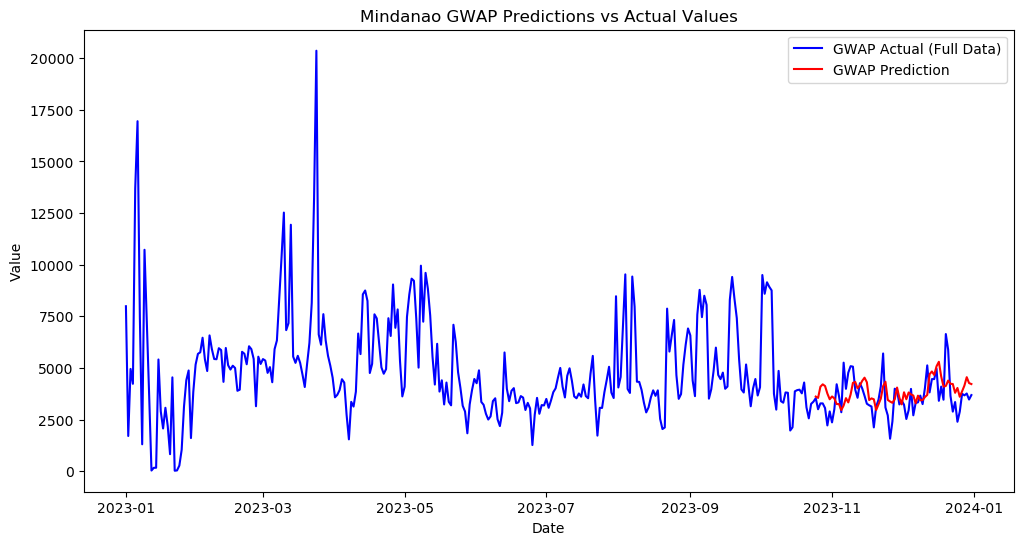

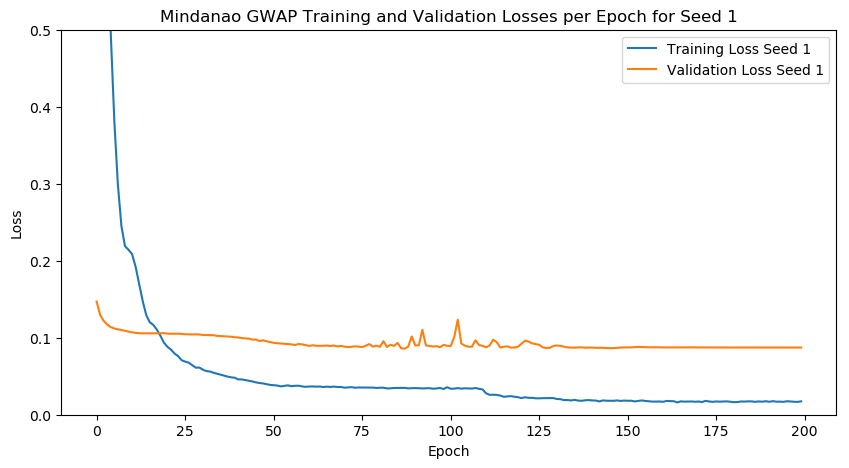

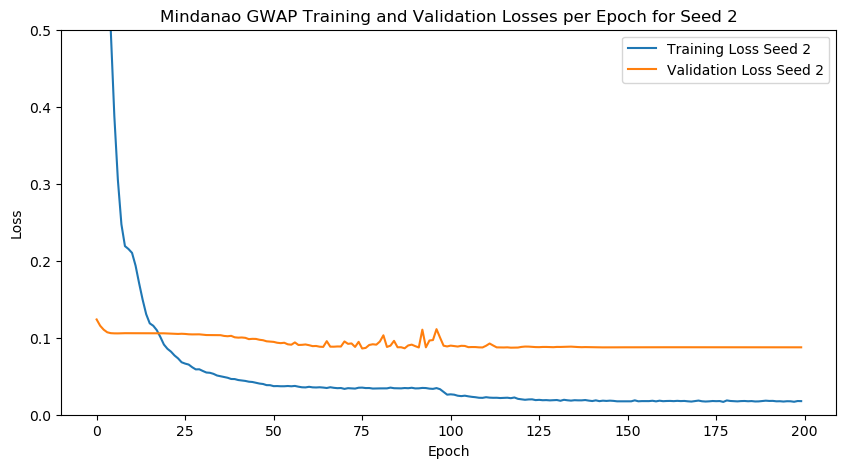

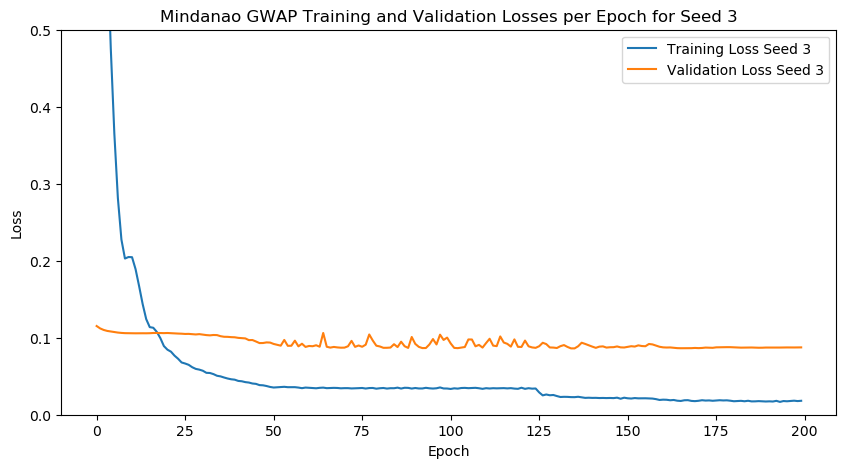

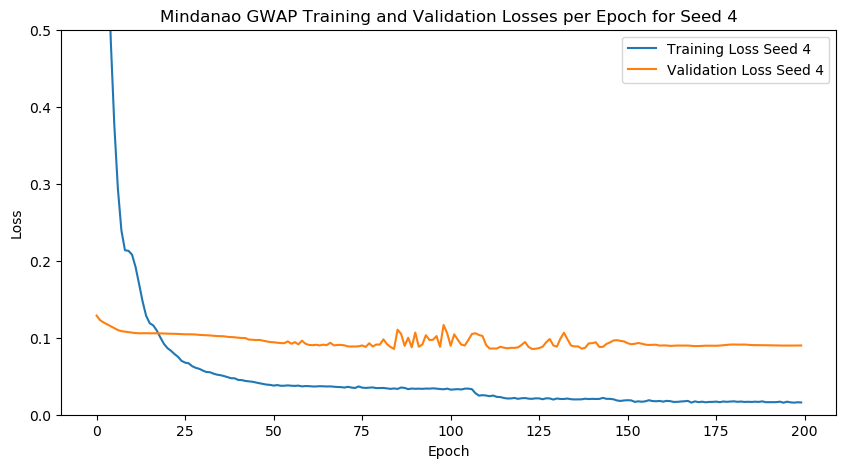

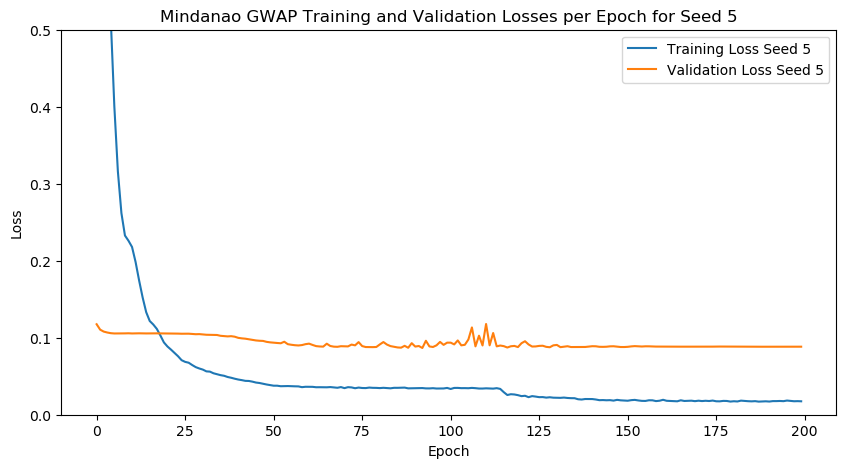

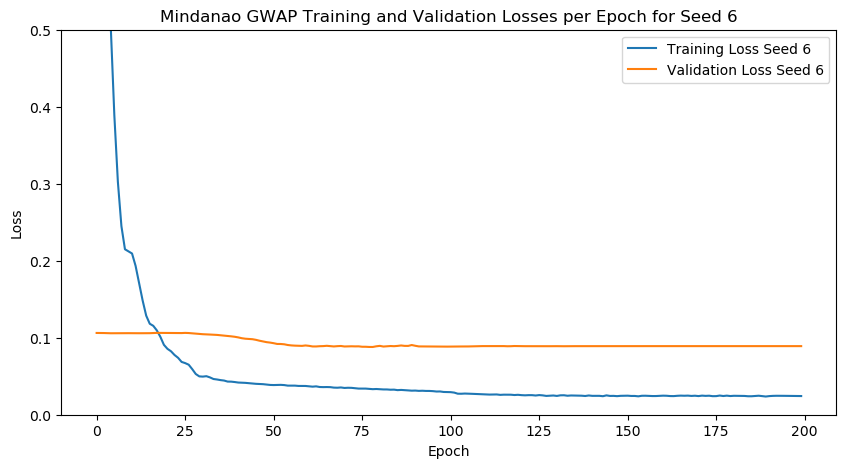

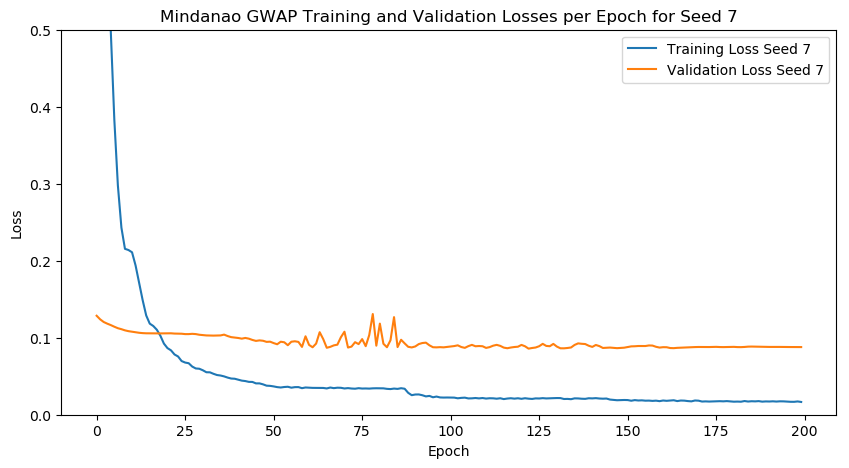

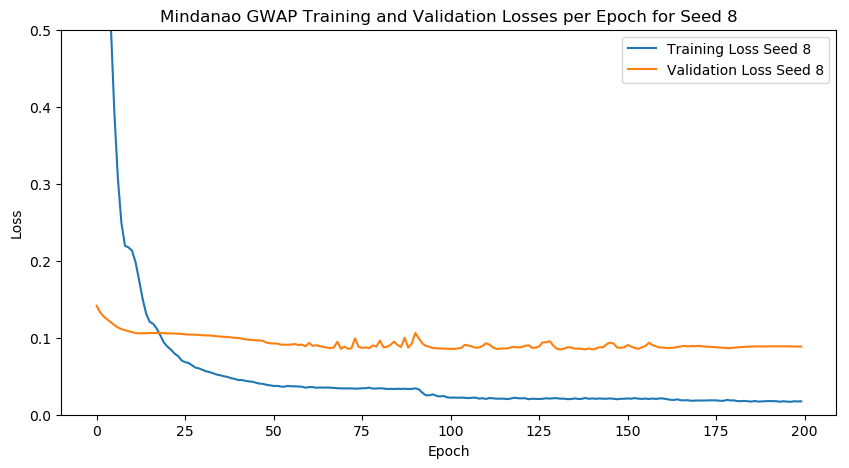

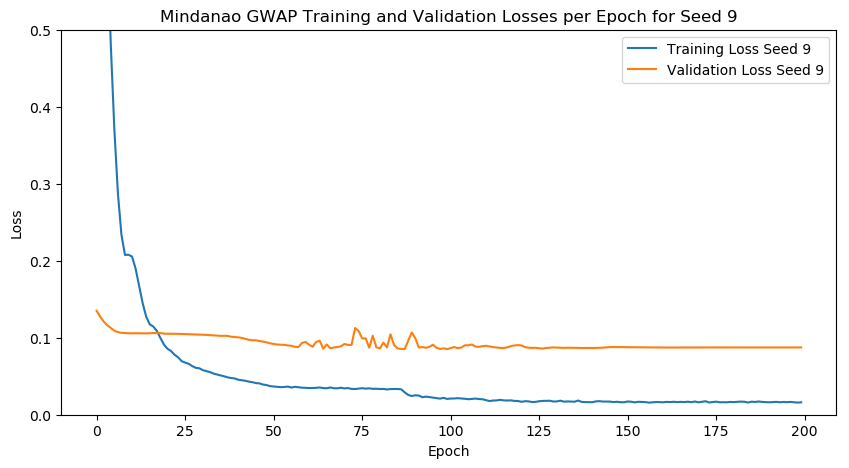

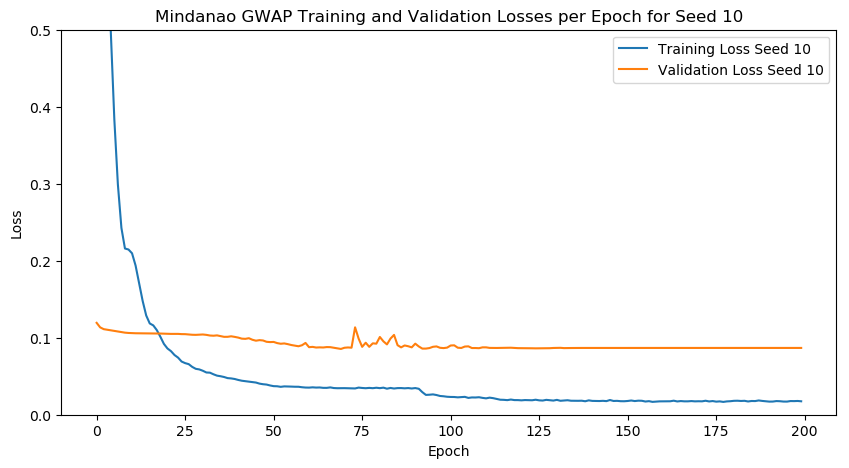

d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have val

Average LWAP RMSE loss over 10 runs: 1101.3478
Average LWAP MAE loss over 10 runs: 899.5492
Average LWAP MAPE loss over 10 runs: 0.2488


d:\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


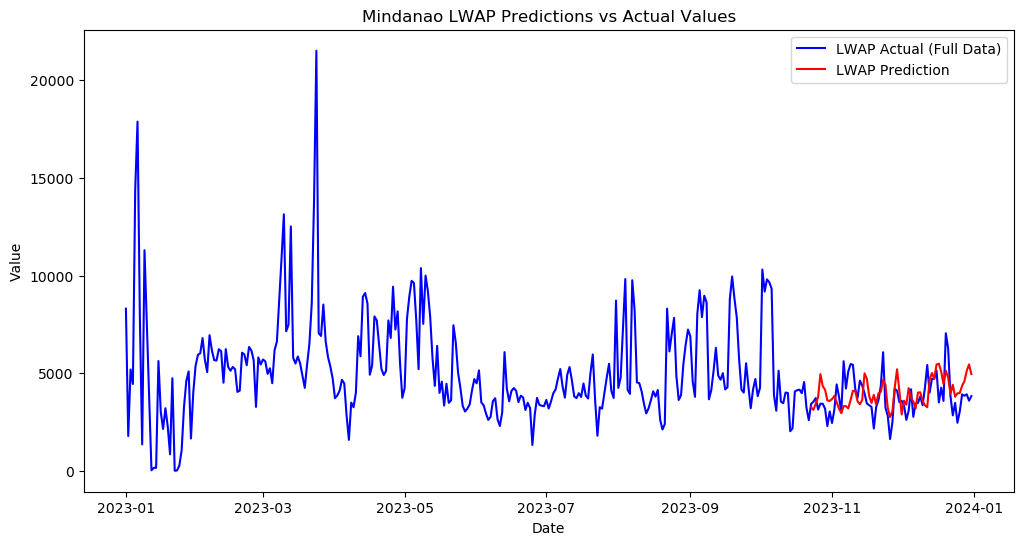

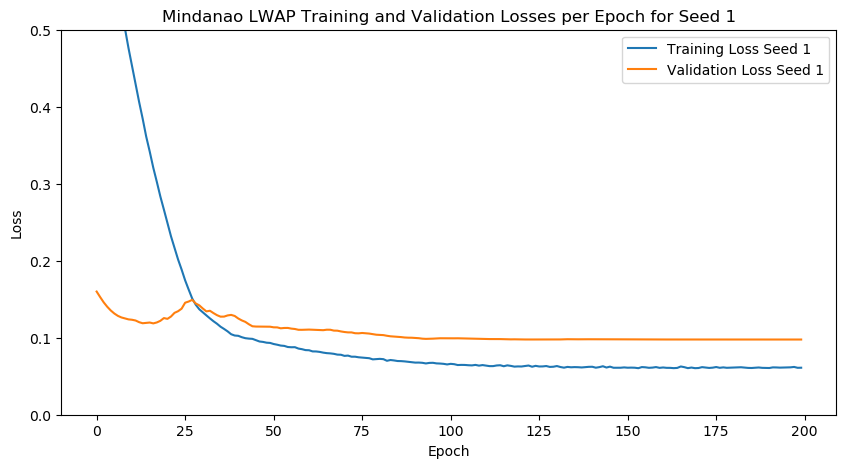

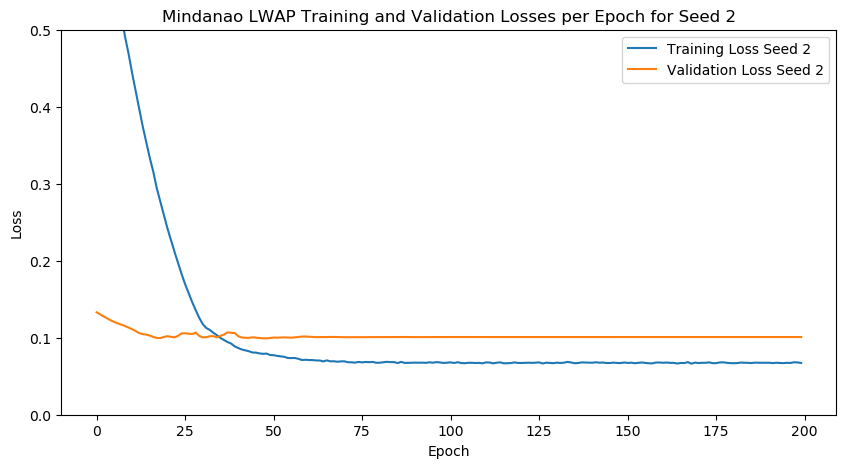

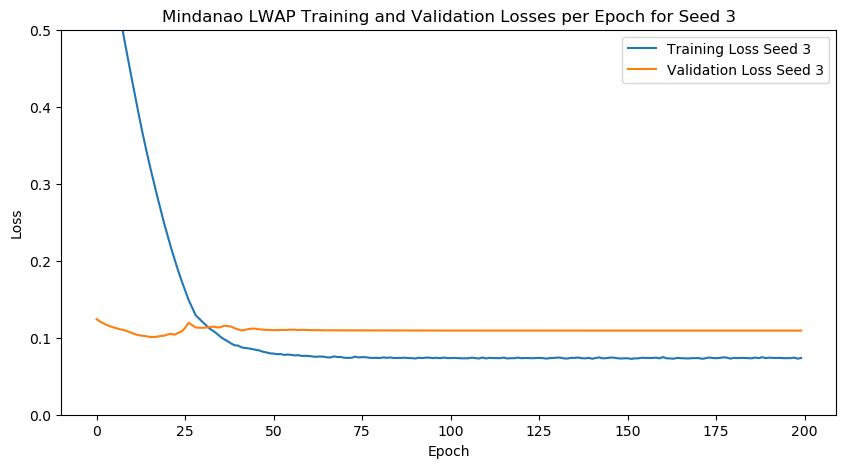

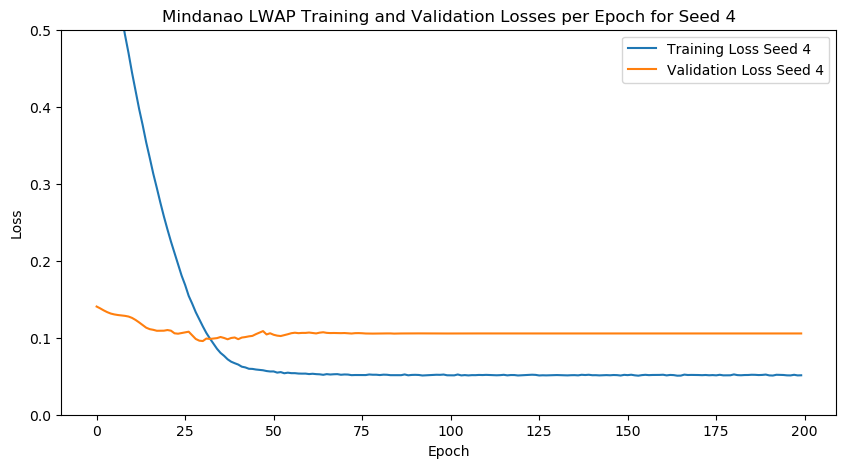

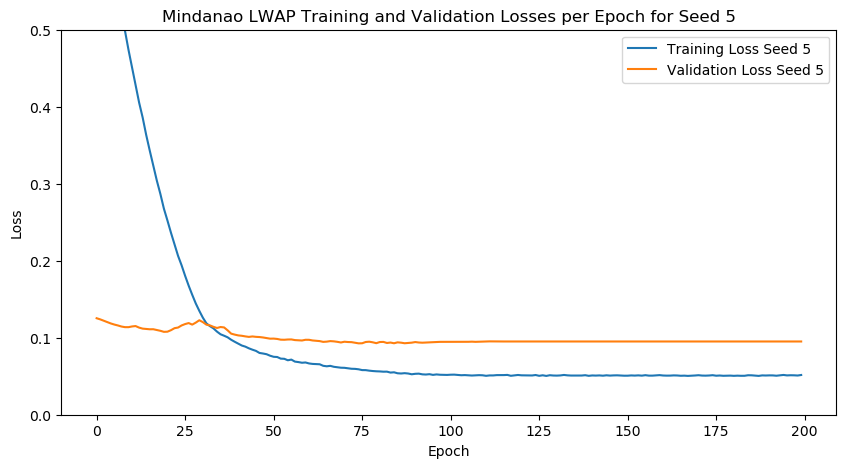

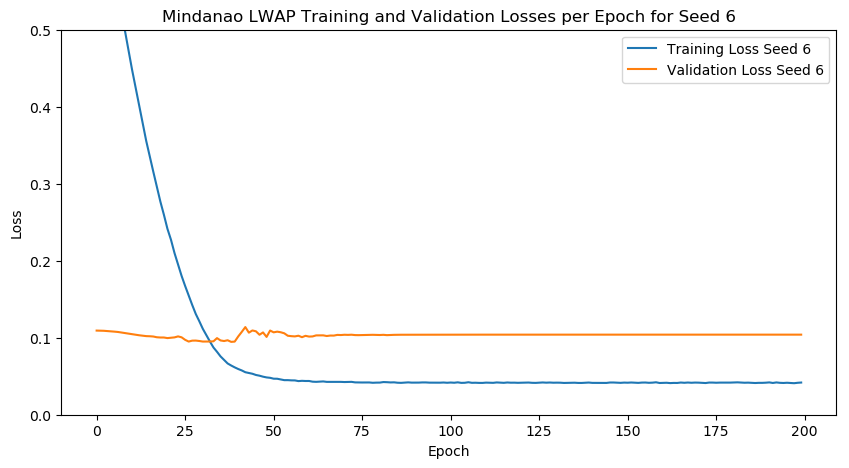

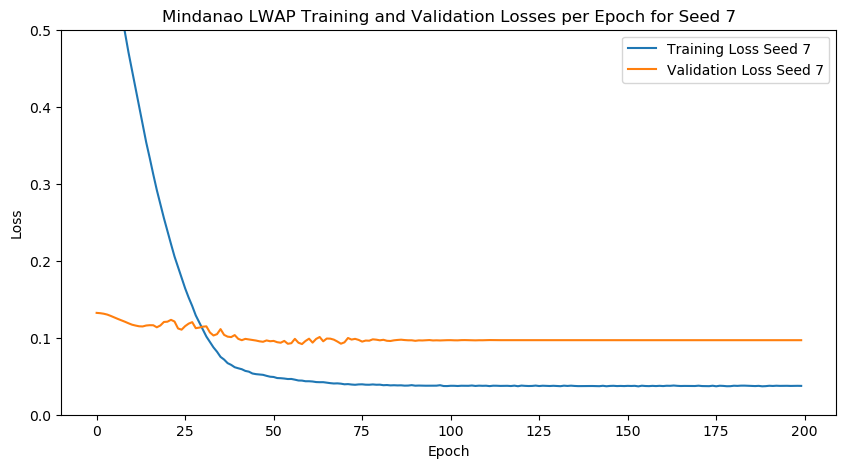

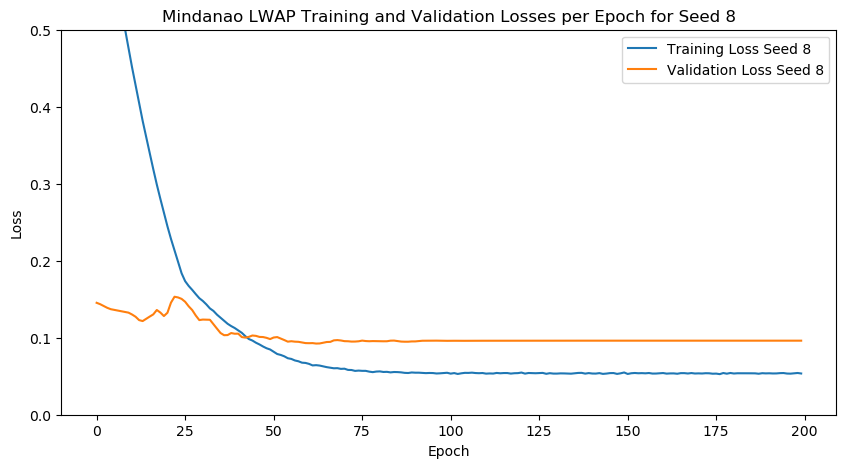

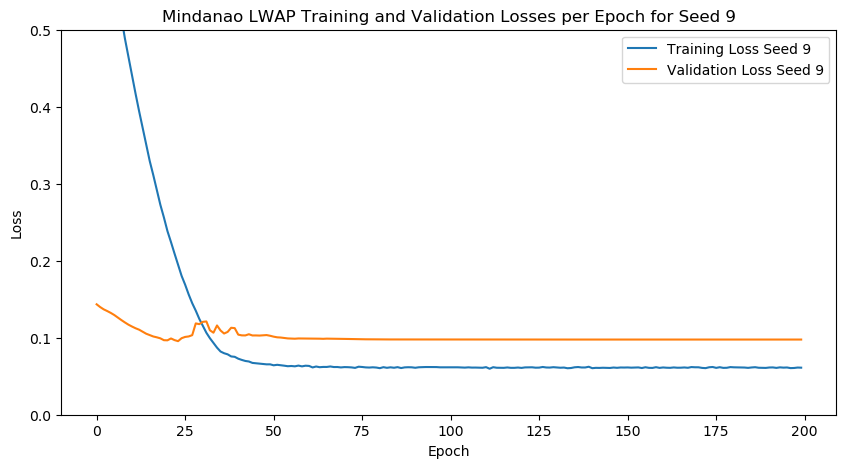

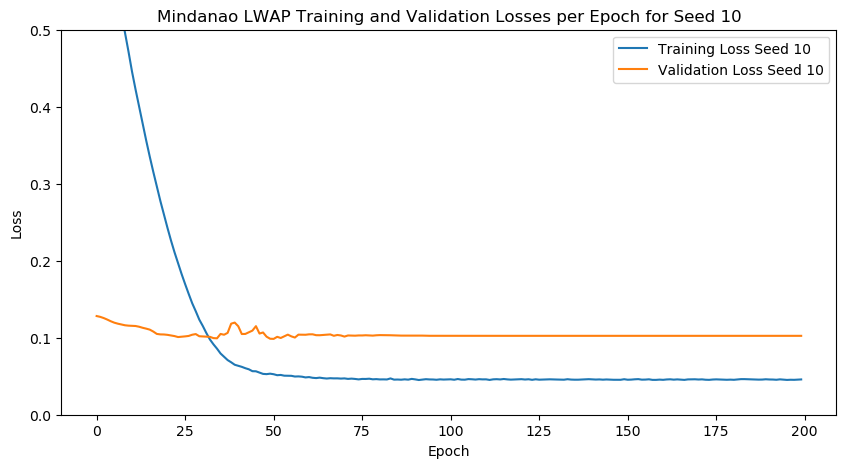

In [12]:
i=0
for regionname in regionnames:
        island = ""
        if regionname=="LUZ":
            island="Luzon"
        elif regionname=="VIS":
            island="Visayas"
        else:
            island="Mindanao"
        for target_label in target_labels:
            transformed_features = load_data(regionname,target_label,True,True)
            transformed_target = load_data(regionname,target_label,False,True)
            X = transformed_features.values
            y = transformed_target.values
            train_data, val_data, test_data = split_data(X) 
            train_labels, val_labels, test_labels = split_data(y)
            actual_values = load_data(regionname,target_label,False,False)
            input_size = train_data.shape[1]  
            output_size = train_labels.shape[1]
            fts.run_hyperparams(specific_config[i], train_data, val_data, test_data, 
            train_labels, val_labels,input_size, output_size, epoch, island, LSTMModel, train_criterion, test_criterion, 
            actual_values, regionname, target_label,output_base_folder)
            i+=1